In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<Axes: xlabel='V1', ylabel='V2'>

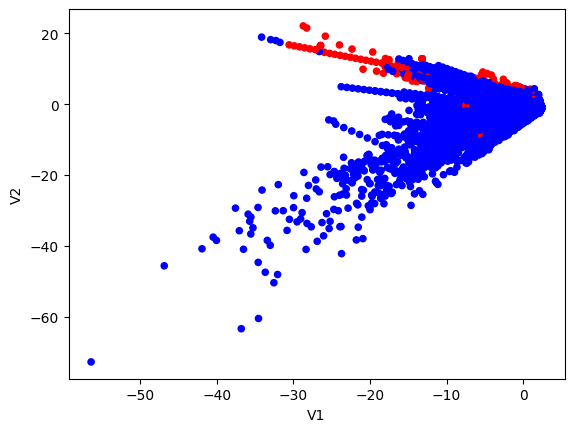

In [3]:
df['color'] = df['Class'].apply(lambda x: 'r' if x==1 else 'b')
df.plot.scatter('V1','V2',c="color")

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

reduced_df = pca.fit_transform(df[df.columns[1:-3]])

In [5]:
reduced_df[1,:]

array([-1.19185447, -0.26523357])

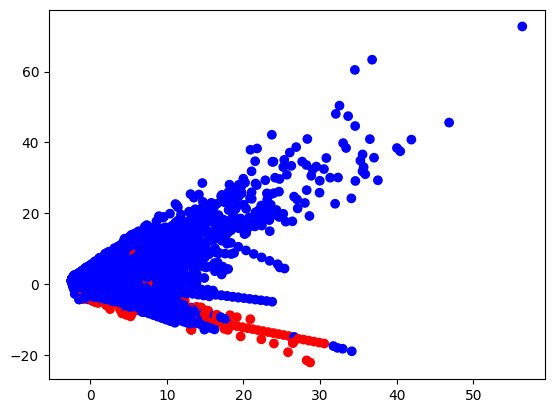

In [6]:
plt.scatter(reduced_df[:,0], reduced_df[:,1], c= df.color)

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

reduced_df = pca.fit_transform(df[df.columns[1:-3]])

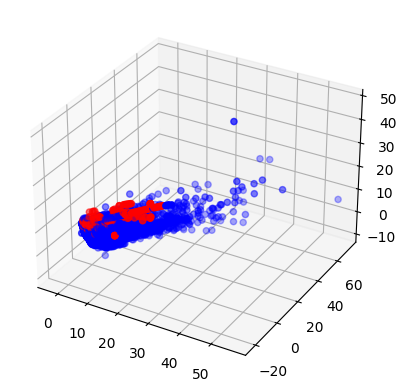

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(reduced_df[:,0], reduced_df[:,1], reduced_df[:,2], c = df.color)

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
reduced_df_lda = lda.fit_transform(df[df.columns[1:-3]], df['Class'])



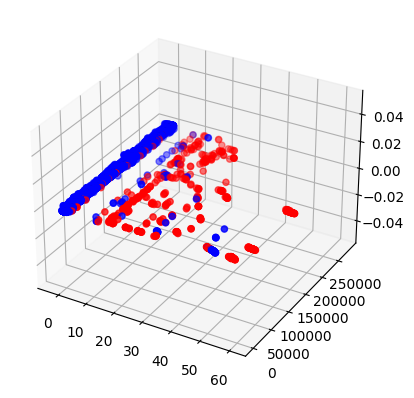

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(reduced_df_lda[:,0], np.arange(reduced_df_lda.shape[0]), np.zeros(reduced_df_lda.shape[0]), c = df.color)

In [11]:
df_thousand = pd.concat([df[df['Class'] == 1].head(500), df[df['Class'] == 0].head(500)], ignore_index=True)

In [12]:
df_thousand

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,color
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1,r
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1,r
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1,r
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1,r
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1,r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,365.0,-1.209437,0.949446,-0.429811,-2.640094,2.601387,3.056966,0.473495,0.280729,0.853043,...,-0.449815,-0.088677,1.030439,-0.048967,0.671979,-0.612153,-0.224000,0.68,0,b
988,366.0,-1.185698,-0.386510,1.623072,1.636406,1.102506,-0.683317,-0.303337,0.285653,-0.056085,...,-0.006952,0.040889,0.040937,0.009224,-0.201042,0.106580,0.140465,9.99,0,b
989,366.0,1.020399,-0.639479,0.941568,0.121307,-0.996320,0.177803,-0.589656,0.153583,0.835979,...,-0.341663,-0.060548,0.116672,0.144624,0.932850,-0.049522,0.018131,97.47,0,b
990,367.0,1.256217,0.255028,0.277716,0.706677,-0.495831,-1.106735,-0.008493,-0.124504,0.243687,...,-0.943830,0.146551,0.307164,0.169070,0.099129,-0.032095,0.027743,1.29,0,b


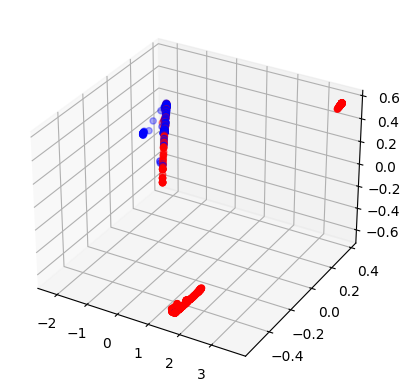

In [19]:
from sklearn.manifold import TSNE

#n_components 2,3,  n_iter: 250, 500, 1000, 5000

tsne = TSNE(n_components=3, n_iter=250)
reduced_df_tsne = tsne.fit_transform(df_thousand[df_thousand.columns[1:-3]])

x = reduced_df_tsne[:, 0]
y = reduced_df_tsne[:, 1]
z = reduced_df_tsne[:, 2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, c=df_thousand.color)

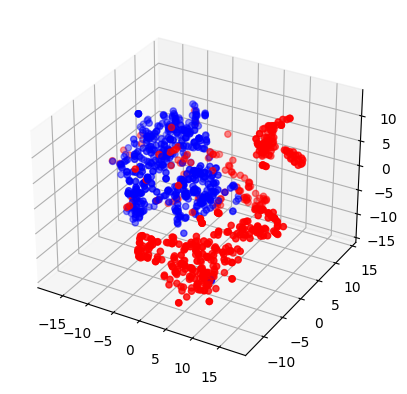

In [20]:
tsne = TSNE(n_components=3, n_iter=500)
reduced_df_tsne = tsne.fit_transform(df_thousand[df_thousand.columns[1:-3]])

x = reduced_df_tsne[:, 0]
y = reduced_df_tsne[:, 1]
z = reduced_df_tsne[:, 2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, c=df_thousand.color)

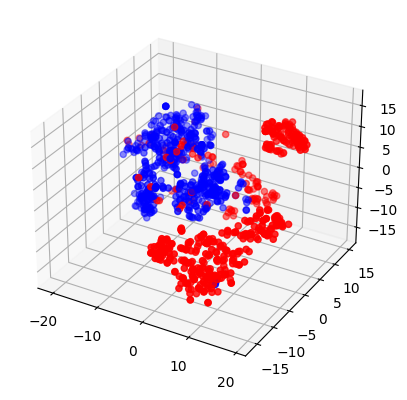

In [21]:
tsne = TSNE(n_components=3, n_iter=1000)
reduced_df_tsne = tsne.fit_transform(df_thousand[df_thousand.columns[1:-3]])

x = reduced_df_tsne[:, 0]
y = reduced_df_tsne[:, 1]
z = reduced_df_tsne[:, 2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, c=df_thousand.color)

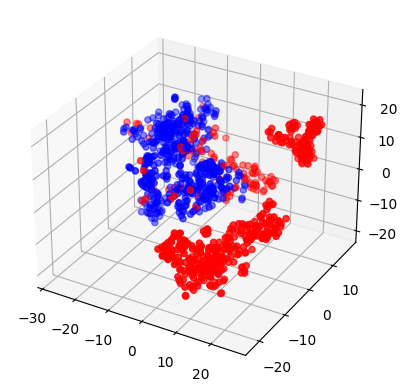

In [22]:
tsne = TSNE(n_components=3, n_iter=5000)
reduced_df_tsne = tsne.fit_transform(df_thousand[df_thousand.columns[1:-3]])

x = reduced_df_tsne[:, 0]
y = reduced_df_tsne[:, 1]
z = reduced_df_tsne[:, 2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, c=df_thousand.color)

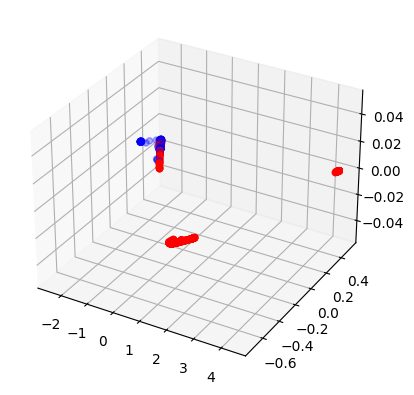

In [23]:
tsne = TSNE(n_components=2, n_iter=250)
reduced_df_tsne = tsne.fit_transform(df_thousand[df_thousand.columns[1:-3]])

x = reduced_df_tsne[:, 0]
y = reduced_df_tsne[:, 1]
z = np.zeros(reduced_df_tsne.shape[0])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, c=df_thousand.color)

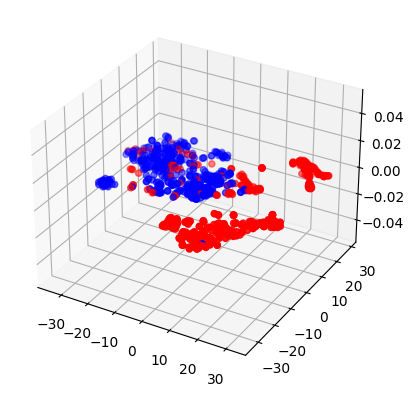

In [24]:
tsne = TSNE(n_components=2, n_iter=500)
reduced_df_tsne = tsne.fit_transform(df_thousand[df_thousand.columns[1:-3]])

x = reduced_df_tsne[:, 0]
y = reduced_df_tsne[:, 1]
z = np.zeros(reduced_df_tsne.shape[0])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, c=df_thousand.color)

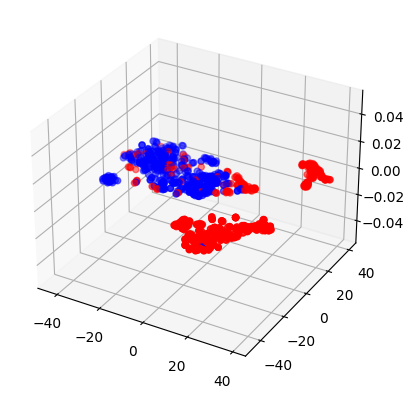

In [25]:
tsne = TSNE(n_components=2, n_iter=1000)
reduced_df_tsne = tsne.fit_transform(df_thousand[df_thousand.columns[1:-3]])

x = reduced_df_tsne[:, 0]
y = reduced_df_tsne[:, 1]
z = np.zeros(reduced_df_tsne.shape[0])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, c=df_thousand.color)

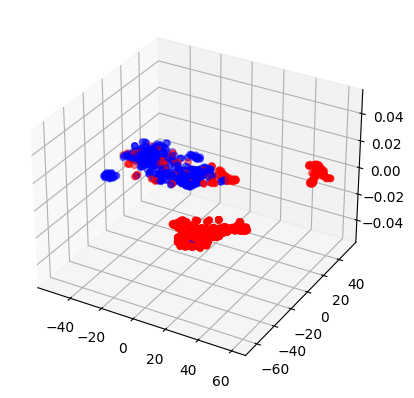

In [26]:
tsne = TSNE(n_components=2, n_iter=5000)
reduced_df_tsne = tsne.fit_transform(df_thousand[df_thousand.columns[1:-3]])

x = reduced_df_tsne[:, 0]
y = reduced_df_tsne[:, 1]
z = np.zeros(reduced_df_tsne.shape[0])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, c=df_thousand.color)